In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import manifold
import hdbscan
import os
import json

import sys
sys.path.append('..')
from src.band_plotters import DATA_DIRECTORY

In [2]:
FINGERPRINT_NAME = "all_k_branches_histogram"
FINGERPRINT_LENGTH = 120
PERPLEXITY = 30
OUTPUT_NAME = f"{FINGERPRINT_NAME}_perplexity_{PERPLEXITY}_length_{FINGERPRINT_LENGTH}.csv"

To make a new finerprint all you need to change is the constants above and/or the calc_fingerprint function below.
# All K Branches Histogram Fingerprint
Bin all energy values between -8 and +8 eV for each branch in K space.

## Start with Anupam's list of materials

In [3]:
df_material = pd.read_csv("../fingerprints/template.csv", index_col="ID")
df_material.head()

,formula,gen_formula,space_group,segments,flat_segments,flatness_score,discovery,binary_flatness,horz_flat_seg,exfoliation_eg,...,C,D,E,F,radio,f_orb,sg_sto_group,percentage_flat,relative_id,crystal_system
ID,,,,,,,,,,,,,,,,,,,,,
2dm-1,IrF2,AB2,164,3,0,0.095102,bottom-up,0,0,0.234620,...,NaN,NaN,NaN,NaN,non-radioactive,no-f-in-valence,NaN,NaN,2dm-4963,trigonal
2dm-2,Ba2Sb,AB2,164,3,1,0.387410,bottom-up,0,0,0.210650,...,NaN,NaN,NaN,NaN,non-radioactive,no-f-in-valence,NaN,NaN,2dm-3279,trigonal
2dm-3,TlS,AB,2,4,4,0.846460,bottom-up,1,3,0.095794,...,NaN,NaN,NaN,NaN,non-radioactive,no-f-in-valence,276.0,24.2,2dm-5155,triclinic
2dm-4,MoCl2,AB2,166,5,4,0.713760,bottom-up,0,0,-0.055818,...,NaN,NaN,NaN,NaN,non-radioactive,no-f-in-valence,NaN,NaN,2dm-4342,trigonal
2dm-6,RuI2,AB2,164,3,1,0.264930,bottom-up,0,0,0.084831,...,NaN,NaN,NaN,NaN,non-radioactive,no-f-in-valence,NaN,NaN,2dm-3574,trigonal


## Fingerprint Function Here
Fingerprint functions take material ID as only input

array([ 0.,  0.,  0.,  0.,  0.,  6., 31., 17.,  9.,  5., 10.,  8.,  7.,
       14.,  3.,  2.,  1.,  2.,  1.,  1.,  5.,  5.,  3.,  9., 16.,  9.,
        6., 15., 10., 13., 10., 11., 13., 12., 17., 10., 11., 22., 18.,
       17.,  0.,  0.,  0.,  0.,  0.,  0., 44., 19.,  2., 16.,  9.,  6.,
        9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,
        0.,  0., 11., 14., 10.,  3., 11., 17., 17., 35., 44., 18., 45.,
       31., 22.,  0.,  0.,  0.,  0.,  0.,  6., 36., 10., 12.,  6.,  3.,
        3., 14., 17.,  4.,  2.,  2.,  1.,  2.,  1.,  7.,  4.,  5., 10.,
       14., 10.,  8., 18., 16.,  9.,  7., 17., 11., 18., 12.,  9., 10.,
       16., 12., 18.])

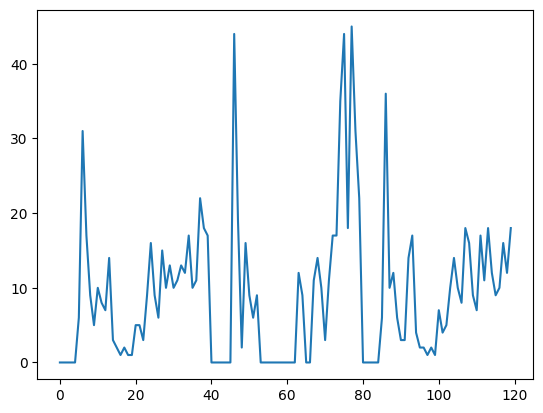

In [4]:
def calc_fingerprint(material_id, fingerprint_length=FINGERPRINT_LENGTH, e_range=[-8, 8]):
    filename_bands=DATA_DIRECTORY/f"bands/{material_id}.json"
    if not filename_bands.exists():
        print(f"No such file {filename_bands}")
        
    bands_dict=json.load(open(filename_bands))

    fingerprint = np.zeros(fingerprint_length)
    
    k_branches = bands_dict["branches"]
    length_per_branch = fingerprint_length // len(k_branches)

    energies = np.array(bands_dict["bands"]["1"])

    for i, branch in enumerate(k_branches):
        branch_energies = energies[:, branch["start_index"]:branch["end_index"]+1]
        counts, edges = np.histogram(branch_energies, bins=length_per_branch, range=e_range)
        fingerprint[i*length_per_branch : (i+1)*length_per_branch] = counts
    
    return fingerprint
    

fp = calc_fingerprint("2dm-1")
plt.plot(fp)
fp

In [5]:
fingerprint_array = np.zeros([len(df_material), FINGERPRINT_LENGTH])

In [6]:
for i, material_id in enumerate(df_material.index):
    if i % 100 == 0:
        print(i, "/", len(df_material))

    fingerprint_array[i, :] = calc_fingerprint(material_id, FINGERPRINT_LENGTH)

print(fingerprint_array)

0 / 5270
100 / 5270
200 / 5270
300 / 5270
400 / 5270
500 / 5270
600 / 5270
700 / 5270
800 / 5270
900 / 5270
1000 / 5270
1100 / 5270
1200 / 5270
1300 / 5270
1400 / 5270
1500 / 5270
1600 / 5270
1700 / 5270
1800 / 5270
1900 / 5270
2000 / 5270
2100 / 5270
2200 / 5270
2300 / 5270
2400 / 5270
2500 / 5270
2600 / 5270
2700 / 5270
2800 / 5270
2900 / 5270
3000 / 5270
3100 / 5270
3200 / 5270
3300 / 5270
3400 / 5270
3500 / 5270
3600 / 5270
3700 / 5270
3800 / 5270
3900 / 5270
4000 / 5270
4100 / 5270
4200 / 5270
4300 / 5270
4400 / 5270
4500 / 5270
4600 / 5270
4700 / 5270
4800 / 5270
4900 / 5270
5000 / 5270
5100 / 5270
5200 / 5270
[[ 0.  0.  0. ... 16. 12. 18.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [42.  0.  0. ...  0.  0.  0.]
 ...
 [42.  0. 79. ... 42.  3.  0.]
 [34.  7.  5. ... 21. 23. 13.]
 [27. 37. 16. ... 19. 19.  7.]]


In [7]:
#check for NaNs 
np.isnan(fingerprint_array).sum()

0

## Create T-SNE Reduced Dimension Fingerprints

In [8]:
tsne = manifold.TSNE(n_components=2, early_exaggeration=12.0, init="pca",learning_rate=100, random_state=0, perplexity=PERPLEXITY ,n_iter=10000, verbose=2)
fingerprint_2d = tsne.fit_transform(fingerprint_array)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5270 samples in 0.003s...
[t-SNE] Computed neighbors for 5270 samples in 0.618s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5270
[t-SNE] Computed conditional probabilities for sample 2000 / 5270
[t-SNE] Computed conditional probabilities for sample 3000 / 5270
[t-SNE] Computed conditional probabilities for sample 4000 / 5270
[t-SNE] Computed conditional probabilities for sample 5000 / 5270
[t-SNE] Computed conditional probabilities for sample 5270 / 5270
[t-SNE] Mean sigma: 55.096417
[t-SNE] Computed conditional probabilities in 0.303s
[t-SNE] Iteration 50: error = 82.2302017, gradient norm = 0.0106439 (50 iterations in 1.918s)
[t-SNE] Iteration 100: error = 79.7686768, gradient norm = 0.0017708 (50 iterations in 1.538s)
[t-SNE] Iteration 150: error = 79.5656738, gradient norm = 0.0003388 (50 iterations in 1.438s)
[t-SNE] Iteration 200: error = 79.5588684, gradient norm = 0.0001215 (50 iterations in 1.733s)
[

## Quick cluster (not saved) and plots to check fingerprint and T-SNE worked

In [11]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,\
                        gen_min_span_tree=False, leaf_size=40, metric='minkowski', cluster_selection_method='leaf', min_cluster_size=4, min_samples=4, p=0.2)
clusterer.fit(fingerprint_array)
labels = clusterer.labels_

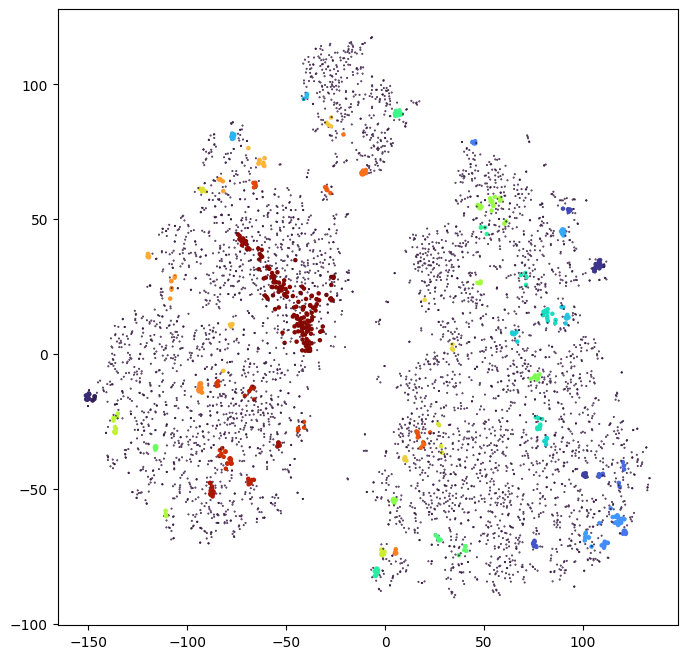

In [12]:
fig, ax  = plt.subplots(figsize=(8,8))
size=np.ones((len(labels),1))*5
size[labels==-1]=0.2

ax.scatter(fingerprint_2d[:,0], fingerprint_2d[:,1],s=size, c=labels*5, cmap="turbo")

## Add fingerprints, T-SNE to dataframe

In [13]:
df = df_material.join(pd.DataFrame(fingerprint_array, index=df_material.index))
df["fx"] = fingerprint_2d[:, 0]
df["fy"] = fingerprint_2d[:, 1]
df.head()

,formula,gen_formula,space_group,segments,flat_segments,flatness_score,discovery,binary_flatness,horz_flat_seg,exfoliation_eg,...,112,113,114,115,116,117,118,119,fx,fy
ID,,,,,,,,,,,,,,,,,,,,,
2dm-1,IrF2,AB2,164,3,0,0.095102,bottom-up,0,0,0.234620,...,11.0,18.0,12.0,9.0,10.0,16.0,12.0,18.0,-54.525272,31.900337
2dm-2,Ba2Sb,AB2,164,3,1,0.387410,bottom-up,0,0,0.210650,...,26.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,-83.819962,-37.819603
2dm-3,TlS,AB,2,4,4,0.846460,bottom-up,1,3,0.095794,...,77.0,50.0,17.0,0.0,0.0,0.0,0.0,0.0,76.890816,-31.039242
2dm-4,MoCl2,AB2,166,5,4,0.713760,bottom-up,0,0,-0.055818,...,25.0,23.0,41.0,26.0,43.0,38.0,49.0,73.0,1.186618,83.082001
2dm-6,RuI2,AB2,164,3,1,0.264930,bottom-up,0,0,0.084831,...,20.0,19.0,27.0,18.0,15.0,26.0,22.0,26.0,-58.914627,52.385628


In [15]:
df.to_csv("../fingerprints/"+OUTPUT_NAME)